In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules

IPythonConsole.ipython_3d = True

import json

RDKit WARNING: [16:15:32] Enabling RDKit 2019.09.1 jupyter extensions


In [4]:
smiles='C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=C(C4=CC=CC=C4C=C3)C5=C(C=CC6=CC=CC=C65)P(C7=CC=CC=C7)C8=CC=CC=C8'
smiles='[B-](F)(F)(F)F.C1CCC(CC1)[PH+](C2CCCCC2)C3CCCCC3'
#smiles='Cc1ccccc1P(c2ccccc2C)c3ccccc3C'
#smiles='CC(C)Cc1ccc(cc1)C(C)C(=O)O'


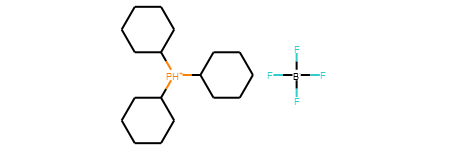

In [5]:
# default
m = Chem.MolFromSmiles(smiles)
m

In [32]:
# with hydrogen
AllChem.AddHs(m)

ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.AddHs(NoneType)
did not match C++ signature:
    AddHs(class RDKit::ROMol mol, bool explicitOnly=False, bool addCoords=False, class boost::python::api::object onlyOnAtoms=None, bool addResidueInfo=False)

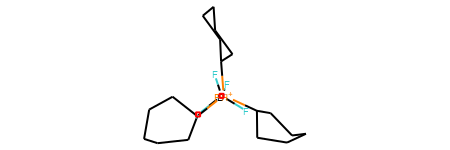

In [27]:
# embed without H
AllChem.EmbedMolecule(m)
AllChem.MMFFOptimizeMolecule(m)
m

In [28]:
print (Chem.MolToMolBlock(m))


     RDKit          3D

 24 25  0  0  0  0  0  0  0  0999 V2000
    0.0075    0.0003   -0.0145 B   0  0  0  0  0  4  0  0  0  0  0  0
   -0.3371    1.0559   -0.9344 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.2005   -0.7246   -0.4446 F   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1377   -0.9026    0.1040 F   0  0  0  0  0  0  0  0  0  0  0  0
    0.2668    0.5710    1.2895 F   0  0  0  0  0  0  0  0  0  0  0  0
    4.1048   -1.8413    0.3981 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1836   -2.2696   -0.7289 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7384   -2.0349   -0.3076 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7233   -0.7263    0.4563 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.3894   -0.8401    1.8032 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.4308   -1.9251    1.7440 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1085    0.0198    0.5541 P   0  0  0  0  0  4  0  0  0  0  0  0
   -0.0174    1.6745    0.0174 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0650    2.7419    1

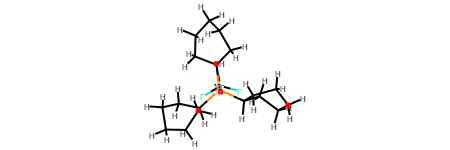

In [29]:
# embed with H
mh = AllChem.AddHs(m)
AllChem.EmbedMolecule(mh)
AllChem.MMFFOptimizeMolecule(mh)

mh

In [10]:
print (Chem.MolToMolBlock(mh))


     RDKit          3D

 43 45  0  0  0  0  0  0  0  0999 V2000
   -1.4918   -3.0264    0.9729 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0927   -1.9938    0.0511 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.2689   -2.3398   -0.6418 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.8830   -1.4404   -1.5089 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.3304   -0.1817   -1.6974 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1620    0.1771   -1.0207 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5149   -0.7120   -0.1398 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0201   -0.2345    0.7454 P   0  0  0  0  0  0  0  0  0  0  0  0
    0.1347    1.5853    0.5387 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.9203    2.1612   -0.4793 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0105    3.5460   -0.6412 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3173    4.3913    0.2132 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4643    3.8524    1.2314 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5640    2.4592    1

In [11]:
Chem.MolToMolFile(mh, "mol3.mol")

In [12]:
Chem.MolToPDBFile(mh, "mol3.pdb")
Chem.MolToXYZFile(mh, "mol3.gjf")

In [13]:
%%time
# embed multiple conformations
cids = AllChem.EmbedMultipleConfs(mh, numConfs=30, numThreads=0)
AllChem.MMFFOptimizeMoleculeConfs(mh)

Wall time: 1.2 s


[(0, 82.14369281088035),
 (0, 85.69423029728317),
 (0, 85.69423051119784),
 (0, 85.6942304005351),
 (0, 85.6942303867998),
 (0, 85.69423075693612),
 (0, 82.14369270153541),
 (0, 85.69423039131992),
 (0, 85.69423129357385),
 (1, 82.14391150359816),
 (0, 85.69423021824515),
 (0, 85.69423142908204),
 (1, 85.694237283781),
 (0, 82.14369177862665),
 (0, 85.69423021940291),
 (0, 85.69423032460348),
 (0, 89.57802077323713),
 (0, 85.69423074205861),
 (1, 85.69428113471413),
 (0, 85.6942304252302),
 (0, 82.14369170371718),
 (0, 85.69423029953481),
 (0, 85.69423037442705),
 (0, 82.1436920338681),
 (0, 89.5780208792766),
 (0, 85.69423116485221),
 (0, 85.69423044432776),
 (0, 82.14369179353983),
 (0, 82.14369179133435),
 (0, 85.69423025661534)]

In [17]:
print (len(cids))

30


In [18]:
rmslist = []
AllChem.AlignMolConformers(mh, RMSlist=rmslist)

In [19]:
rmslist

[4.413107915253844,
 3.618949672540051,
 4.352132363458418,
 4.593318176946677,
 3.4560179450586443,
 4.520234035720179,
 2.0917096452755577,
 1.9535869637790124,
 5.157724094067538,
 4.526976958166207,
 4.752851286749514,
 5.302361717689048,
 3.6603931353027583,
 1.6321974470927803,
 4.71870197153242,
 4.699307764647515,
 1.1505601281040465,
 4.721929173480967,
 5.264976927359259,
 4.431827480910348,
 5.263674591757647,
 4.6389361769799535,
 4.510905400782062,
 4.8932289372866,
 5.160765953883258,
 4.413685062336252,
 5.168250984989371,
 5.346265371587558,
 4.625795908801089]

In [52]:
Chem.MolToPDBFile(mh, 'mol1_with_C.pdb')

In [61]:
for i in cids:
    print (Chem.MolToXYZBlock(mh, i))

78

C     -4.236157    0.911135    4.110568
C     -3.109614    0.119824    3.908550
C     -2.408879    0.196659    2.701718
C     -2.829624    1.048600    1.664681
C     -3.945060    1.865686    1.907267
C     -4.650148    1.789166    3.113085
P     -1.862691    1.150744    0.126998
C     -3.021537    1.696666   -1.166704
C     -2.599876    2.721714   -2.031042
C     -3.427553    3.189945   -3.055418
C     -4.695015    2.642818   -3.231053
C     -5.132340    1.626751   -2.385284
C     -4.301232    1.157476   -1.362855
C     -1.569542   -0.606115   -0.368864
C     -0.349189   -1.002732   -0.995583
C     -0.155505   -2.369759   -1.396939
C      1.011011   -2.843576   -2.048448
C      1.167201   -4.183938   -2.410261
C      0.159532   -5.095715   -2.132726
C     -1.003905   -4.664188   -1.500305
C     -1.173077   -3.317922   -1.134458
C     -2.352288   -2.913715   -0.506240
C     -2.548354   -1.584417   -0.135137
C      0.748118   -0.008983   -1.223303
C      1.753685    0.196103   -0.229

In [73]:
for c in mh.GetConformers():
    print (c)

In [79]:
print (Chem.MolToMolBlock(mh, c.GetId()))


     RDKit          3D

 78 85  0  0  0  0  0  0  0  0999 V2000
   -4.2362    0.9111    4.1106 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1096    0.1198    3.9086 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4089    0.1967    2.7017 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.8296    1.0486    1.6647 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9451    1.8657    1.9073 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.6501    1.7892    3.1131 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8627    1.1507    0.1270 P   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0215    1.6967   -1.1667 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5999    2.7217   -2.0310 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.4276    3.1899   -3.0554 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.6950    2.6428   -3.2311 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.1323    1.6268   -2.3853 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.3012    1.1575   -1.3629 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5695   -0.6061   -0